# <img style="float: left; padding-right: 10px; width: 45px" src="https://github.com/Harvard-IACS/2018-CS109A/blob/master/content/styles/iacs.png?raw=true"> CS-S109A Introduction to Data Science 

## Lecture 2 (Pandas + Beautiful Soup)

**Harvard University**<br>
**Summer 2020**<br>
**Instructors:** Kevin Rader<br>
**Authors:** Rahul Dave, David Sondak, Will Claybaugh, Pavlos Protopapas, Chris Tanner, Kevin Rader

---

In [2]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

# Table of Contents 
<ol start="0">
<li> Learning Goals </li>
<li> Data without Pandas </li>
<li> Loading and Cleaning with Pandas  </li>
<li> Combinng Data Sources </li>
<li> Basic Scraping with Beautiful Soup </li>
</ol>

## Learning Goals

This Jupyter notebook accompanies Lecture 2. By the end of this lecture, you should be able to:

- Appreciate that base Python is not great for most data handling.
- Understand why and how Pandas can be useful. 
- Use Pandas to:
    - Load data into a DataFrame
    - Access subsets of data based on column and row values
    - Address missing values (e.g., `NaN`)
    - Use `groupby()` to select sections of data.
    - Plot DataFrames (e.g., barplot())
- Use Beautiful Soup to download a webpage and all of its links, and begin to learn parse out tables, links, etc.

## Part 1: Processing Data without Pandas 

`../data/top50.csv` is a dataset found online (Kaggle.com) that contains information about the 50 most popular songs on Spotify in 2019.

Each row represents a distinct song.
The columns (in order) are:
```
ID: a unique ID (i.e., 1-50)
TrackName: Name of the Track
ArtistName: Name of the Artist
Genre: the genre of the track
BeatsPerMinute: The tempo of the song.
Energy: The energy of a song - the higher the value, the more energetic. song
Danceability: The higher the value, the easier it is to dance to this song.
Loudness: The higher the value, the louder the song.
Liveness: The higher the value, the more likely the song is a live recording.
Valence: The higher the value, the more positive mood for the song.
Length: The duration of the song (in seconds).
Acousticness: The higher the value, the more acoustic the song is.
Speechiness: The higher the value, the more spoken words the song contains.
Popularity: The higher the value, the more popular the song is.
```

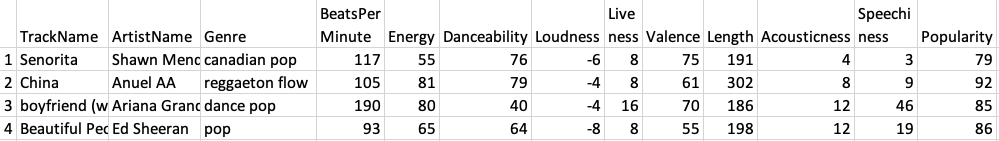

In [3]:
Image("fig/top50_screenshot.png") # sample of the data

### Read and store `../data/top50.csv`

**Q1.1:** Read in the `../data/top50.csv` file and store all of its contents into any data structure(s) that make the most sense to you, keeping in mind that you'd want to easily access any row or column.  Why does a dictionary make the most sense to use for data storage?

In [17]:
f = open("../data/top50.csv")
column_names = f.readline().strip().split(",")[1:] # puts names in a list
cleaned_column_names = [name for name in column_names] # removes the extraneous quotes
cleaned_column_names.insert(0, "ID")

dataset = []

# iterates through each line of the .csv file
for line in f:
    attributes = line.strip().split(",")
    
    # constructs a new dictionary for each line, and
    # appends this dictionary to the `dataset`;
    # thus, the dataset is a list of dictionaries (1 dictionary per song)
    dataset.append(dict(zip(cleaned_column_names, attributes)))
    
# dataset[0:2]

[{'ID': '1',
  'TrackName': 'Senorita',
  'ArtistName': 'Shawn Mendes',
  'Genre': 'canadian pop',
  'BeatsPerMinute': '117',
  'Energy': '55',
  'Danceability': '76',
  'Loudness': '-6',
  'Liveness': '8',
  'Valence': '75',
  'Length': '191',
  'Acousticness': '4',
  'Speechiness': '3',
  'Popularity': '79'},
 {'ID': '2',
  'TrackName': 'China',
  'ArtistName': 'Anuel AA',
  'Genre': 'reggaeton flow',
  'BeatsPerMinute': '105',
  'Energy': '81',
  'Danceability': '79',
  'Loudness': '-4',
  'Liveness': '8',
  'Valence': '61',
  'Length': '302',
  'Acousticness': '8',
  'Speechiness': '9',
  'Popularity': '92'}]

**Q1.2:** Write code to print all songs (Artist and Track name) that are longer than 4 minutes (240 seconds):

In [18]:

########
# your code below: uncomment and fill in the ****
########

#for song in ****:
     #if int(song[****] > ****) :
        # print(****, "-", ****, "is", **** ,"seconds long")
        
for song in dataset:
    if int(song["Length"]) > 240:
        print(song["ArtistName"], "-", song["TrackName"], "is", song["Length"],"seconds long")

Anuel AA - China is 302 seconds long
Bad Bunny - Callaita is 251 seconds long
Sech - Otro Trago - Remix is 288 seconds long
Chris Brown - No Guidance (feat. Drake) is 261 seconds long
J Balvin - LA CANCIÓN is 243 seconds long
Jhay Cortez - No Me Conoce - Remix is 309 seconds long
Lunay - Soltera - Remix is 266 seconds long


**Q1.3:** Write code to print the most popular song (or song(s) if there is a tie):

In [20]:
########
# your code below: uncomment and fill in the ****
########

max_score = -1
most_populars = set()
# for ***:
#    if int(song["Popularity"]) > max_score:
#        most_populars = set([str(song["ArtistName"] + "-" + song["TrackName"])])
#        max_score = int(song["Popularity"])
    # elif ****:
    #    most_populars.add(****)
# print(most_populars)


for song in dataset:
    if int(song["Popularity"]) > max_score:
        most_populars = set([str(song["ArtistName"] + "-" + song["TrackName"])])
        max_score = int(song["Popularity"])
    elif int(song["Popularity"]) == max_score:
        most_populars.add(str(song["ArtistName"] + "-" + song["TrackName"]))
print(most_populars)

{'Billie Eilish-bad guy'}


**Q1.4:** How would you print the songs (and their attributes) in sorted order by their popularity (highest scoring ones first)?

*your answer here*

**Q1.5**: How could you check for null/empty entries?

*your answer here*

Often times, one dataset doesn't contain all of the information you are interested in -- in which case, you need to combine data from multiple files.

**Q1.6:** Imagine we had another table (i.e., .csv file) below. How could we combine its data with our already-existing *dataset*?

*your answer here*

## Part 2: Processing Data _with_ Pandas 

**Pandas** is an _open-source_ Python library designed for **data analysis and processing.** Being _open-sourced_ means that anyone can contribute to it (don't worry, a team of people vett all official updates to the library). Pandas allows for high-performance, easy-to-use data structures. Namely, instead of using N-dimensional arrays like NumPy (which are extremely fast, though), Pandas provides a 2D-table object calleda **DataFrame**.

As a very gross simplification: **NumPy** is great for performing math operations with matrices, whereas **Pandas** is excellent for wrangling, processing, and understanding 2D data like spreadsheets (2D data like spreadsheets is very common and great).

Let's get started with simple examples of how to use Pandas. We will continue with our ``top50.csv`` Spotify music data.

First, we need to import pandas so that we have access to it. For typing convenience, we choose to rename it as ``pd``, which is common practice.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

### Reading in the data
Pandas allows us to [read in various structured files](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) (e.g., .csv, .json, .html, etc) with just one line:

In [2]:
# we don't always need to specify the encoding, but this particular
# file has special characters that we need to handle
top50 = pd.read_csv("../data/top50.csv")

### High-level view of the data

We can view the data frame by simply printing it:

In [3]:
top50

,Unnamed: 0,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


Recall that we can also inspect the file by looking at just the first N rows or last N rows (instead of printing the entire dataframe).

In [25]:
top50.head(5) # first 5 rows
top50.tail(3) # last 3 rows

,Unnamed: 0,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
47,48,Happier,Marshmello,brostep,100,79,69,-3,17,67,214,19,5,88
48,49,Call You Mine,The Chainsmokers,edm,104,70,59,-6,41,50,218,23,3,88
49,50,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12,82


**Q2.1:** That's cool, but we can't see all of the columns too well. Write code to print out the columns of 'top50' and the code to calculate number of columns in it.

In [5]:
######
# your code here
######

print(top50.columns)

print(len(top50.columns))

print(top50.size)
print(top50.shape)

Index(['Unnamed: 0', 'TrackName', 'ArtistName', 'Genre', 'BeatsPerMinute', 'Energy', 'Danceability', 'Loudness', 'Liveness', 'Valence', 'Length', 'Acousticness', 'Speechiness', 'Popularity'], dtype='object')
14
700
(50, 14)


Fortunately, many of the features in our dataset are numeric. Conveniently, Pandas' `describe()` function calculates basic statistics for our columns. It's pretty amazing, as it allows us a very coarse-grain approach to understanding our data and checking for errors. That is, if we notice any summary statistics that are drastically different than what we deem reasonable, we should dive deeper and figure out why the values are what they are.

In [6]:
top50.describe()

,Unnamed: 0,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


**Q2.2:** Which of the variable above appears to be the most skewed?  Investigate its skew with a histogram.

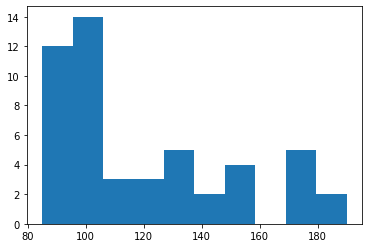

In [30]:
######
# your code here
######

plt.hist(top50['BeatsPerMinute'])
plt.show()

*your answer here* 

Comparing means to median (and inspecting ranges), it appears that BeatsPerMinute, Liveness, Acousticness, and Speechiness are all right-skewed.  We show the histogram for BeatsPerMinute above, which displays the typical right-skew (most observations in lower tail, with a long right-tail).

Notice, it calculated statistics only for the columns that are of numeric data types. What about the textual ones (e.g., Track name and Artist)? Pandas is smart enough to infer the data types. **Don't forget to inspect the columns that are text-based though, as we need to ensure they are sound, too.**

To view the data type of each column:

In [27]:
top50.dtypes

Unnamed: 0         int64
TrackName         object
ArtistName        object
Genre             object
BeatsPerMinute     int64
Energy             int64
Danceability       int64
Loudness           int64
Liveness           int64
Valence            int64
Length             int64
Acousticness       int64
Speechiness        int64
Popularity         int64
dtype: object

**Q2.3:** Write code to obtain the table of frequencies for any categorical variables in the dataset.

In [13]:
#######
# your code here
#######

# There is only one categorical variable: Genre

np.unique(top50['Genre'], return_counts=True)



(array(['atl hip hop', 'australian pop', 'big room', 'boy band', 'brostep',
        'canadian hip hop', 'canadian pop', 'country rap', 'dance pop',
        'dfw rap', 'edm', 'electropop', 'escape room', 'latin',
        'panamanian pop', 'pop', 'pop house', 'r&b en espanol',
        'reggaeton', 'reggaeton flow', 'trap music'], dtype=object),
 array([1, 1, 1, 1, 2, 3, 2, 2, 8, 2, 3, 2, 1, 5, 2, 7, 1, 1, 2, 2, 1]))

In [10]:
top50['Genre'].value_counts()

dance pop           8
pop                 7
latin               5
edm                 3
canadian hip hop    3
canadian pop        2
reggaeton           2
panamanian pop      2
country rap         2
reggaeton flow      2
brostep             2
dfw rap             2
electropop          2
big room            1
boy band            1
pop house           1
atl hip hop         1
trap music          1
escape room         1
australian pop      1
r&b en espanol      1
Name: Genre, dtype: int64

### Exploring the data

I agree with Pandas' handling of the data. If any column contained floating point numbers, we would expect to see such here, too.

Now that we've viewed our dataset at a high-level, let's actually use and explore it.

Recall: we can **access a column of data** the same way we access dictionary by its keys:

In [33]:
top50["Length"]

We could have also used this syntax (identical results):

In [373]:
top50.Length

If we want just the highest or lowest **value** of a given column, we can use the functions ``max()`` and ``min()``, respectively.

In [14]:
top50['Length'].max()

309

In [371]:
top50['Length'].min()

If we want the **row index** that corresponds to a column's max or min value, we can use ``idxmax()`` and ``idxmin()``, respectively.

In [15]:
top50['Length'].idxmax()

22

In [369]:
top50['Length'].idxmin()

We can also add `conditional statements` (e.g., >, <, ==) for columns, which yields a boolean vector:

In [16]:
top50['Length'] > 240

0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13     True
14    False
15     True
16     True
17    False
18    False
19    False
20    False
21    False
22     True
23     True
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
Name: Length, dtype: bool

This is useful, as it allows us to process only the rows with the True values.

The **`loc()`** function allows us to access data via labels:
- A single scalar label
- A list of labels
- A slice object
- A Boolean array

A single scalar:

In [367]:
# single scalar label
top50.loc[0] # prints the (unnamed) row that has a label of 0 (the 1st row)

In [366]:
# list of labels
top50.loc[[0,2]] # prints the (unnamed) rows that have the labels of 0 and 2 (the 1st and 3rd rows)

In [17]:
# a slice of the dataframe, based on the passed-in booleans;
# picture it's like a filter overlaying the DataFrame, and the filter
# dictates which values will be emitted/make it through to us

top50.loc[top50['Length'] > 240] # prints all rows that have Length > 240

,Unnamed: 0,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
10,11,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
13,14,Otro Trago - Remix,Sech,panamanian pop,176,79,73,-2,6,76,288,7,20,87
15,16,No Guidance (feat. Drake),Chris Brown,dance pop,93,45,70,-7,16,14,261,12,15,82
16,17,LA CANCIÓN,J Balvin,latin,176,65,75,-6,11,43,243,15,32,90
22,23,No Me Conoce - Remix,Jhay Cortez,reggaeton flow,92,79,81,-4,9,58,309,14,7,83
23,24,Soltera - Remix,Lunay,latin,92,78,80,-4,44,80,266,36,4,91


In [18]:
top50[top50['Length'] > 240] 

,Unnamed: 0,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
10,11,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
13,14,Otro Trago - Remix,Sech,panamanian pop,176,79,73,-2,6,76,288,7,20,87
15,16,No Guidance (feat. Drake),Chris Brown,dance pop,93,45,70,-7,16,14,261,12,15,82
16,17,LA CANCIÓN,J Balvin,latin,176,65,75,-6,11,43,243,15,32,90
22,23,No Me Conoce - Remix,Jhay Cortez,reggaeton flow,92,79,81,-4,9,58,309,14,7,83
23,24,Soltera - Remix,Lunay,latin,92,78,80,-4,44,80,266,36,4,91


Note, this returns a *DataFrame*. Everything we've learned so far concerns how to use DataFrames, so we can tack on additional syntax to this command if we wish to do further processing.

For example, if we want to index just select columns (e.g., ArtistName, TrackName, and Length) of this returned DataFrame:

In [364]:
top50.loc[top50['Length'] > 240][['ArtistName', 'TrackName', 'Length']]

Note, the above solves our original **Q1.2:** _(Write code to print all songs (Artist and Track name) that are longer than 4 minutes (240 seconds))_

**Q2.4:** Write code to print the most popular song (or song(s) if there is a tie):

In [35]:
######
# your code here
######

top50.iloc[top50['Popularity'].idxmax()]

Unnamed: 0                   10
TrackName               bad guy
ArtistName        Billie Eilish
Genre                electropop
BeatsPerMinute              135
Energy                       43
Danceability                 70
Loudness                    -11
Liveness                     10
Valence                      56
Length                      194
Acousticness                 33
Speechiness                  38
Popularity                   95
Name: 9, dtype: object

We can also sort our data by a single column! This pertains to our original **Q1.4**!

**Q2.4:** Write code to print the songs (and their attributes), if we sorted by their popularity (highest scoring ones first).

In [37]:
# use top50.sort_values() to answer this question

#######
# your code here
#######

top50.sort_values("Popularity", ascending=False)

,Unnamed: 0,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
10,11,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
14,15,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83,-4,12,10,205,10,5,92
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
36,37,Otro Trago,Sech,panamanian pop,176,70,75,-5,11,62,226,14,34,91
21,22,Panini,Lil Nas X,country rap,154,59,70,-6,12,48,115,34,8,91
20,21,Piece Of Your Heart,MEDUZA,pop house,124,74,68,-7,7,63,153,4,3,91
19,20,Truth Hurts,Lizzo,escape room,158,62,72,-3,12,41,173,11,11,91


While ``.loc()`` allows us to index based on passed-in labels, ``.iloc()`` allows us to **access data based on 0-based indices.**

The syntax is ``.iloc[<row selection>, <column selection>]``, where <row selection> and <column selection> can be scalars, lists, or slices of indices.

In [363]:
top50.iloc[5:6] # prints all columns for the 6th row

In [316]:
top50.iloc[:,2] # prints all rows for the 3rd column

In [317]:
top50.iloc[[0,2,3], [2,1]] # prints the 1st, 3rd, and 4th rows of the 3rd and 2nd columns (artist and track)

### Inspecting/cleaning the data

As mentioned, it is imperative to ensure the data is sound to use:
1. Did it come from a trustworthy, authoritative source?
2. Is the data a complete sample?
3. Does the data seem correct?
4. **(optional)** Is the data stored efficiently or does it have redundancies?

Let's walk through each of these points now:

1. Did it come from a trustworthy, authoritative source?

The data came from Kaggle.com, which anyone can publish to. However, the author claims that he/she used Spotify.com's official API to query songs in 2019. There are no public comments for it so far. It's potentially credible.

2. Is the data a complete sample?

Pandas has functions named ``isnull()`` and ``notnull()``, which return DataFrames corresponding to any null or non-null entries, respectively.

For example:

In [319]:
top50[top50.ArtistName.isnull()] # returns an empty DataFrame

In [329]:
top50[top50.ArtistName.notnull()] # returns the complete DataFrame since there are no null Artists

If we run this for all of our features/columns, we will see there are no nulls. Since this dataset is manageable in size, you can also just scroll through it and notice no nulls.

This answers our original **Q1.5**: How could you check for null/empty entries?

Continuing with our data sanity check list:

3. Does the data seem correct?

A quick scroll through the data, and we see a song by _Maluma_ titled _0.95833333_. This is possibly a song about probability, but I think the chances are slim. The song is 176 seconds long (2m56s). Looking on Spotify, we see **Maluma's most popular song is currently _11PM_ which is 2m56s in length!** Somehow, during the creation of the dataset, 11PM became 0.95833333. _Bonus points if you can figure out where this pointing number could have come from._

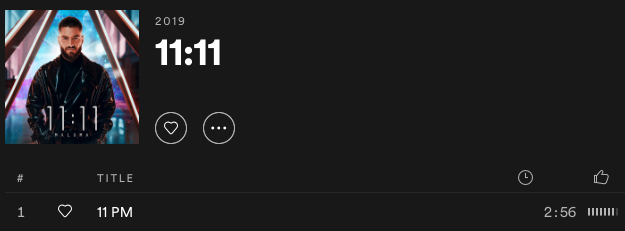

In [38]:
Image("fig/maluma.png") # sample of the data

Since only one song seems obviously wrong, we can manually fix it. And it's worth noting such to ourselves and to whomever else would see our results or receive a copy of our data. If there were many more wrong values, we'd potentialy not fix them, as we'd explore other options.

In [36]:
#top50['TrackName'][top50['ArtistName'] == "Maluma"] = "11PM"
# Watch out for the warning.

# mutch better way to perform the task:
top50['TrackName'].loc[top50['ArtistName'] == "Maluma"] = "11PM"


## Part 3: Grouping and Combining Multiple Data Frames

As mentioned, often times one dataset doesn't contain all of the information you are interested in -- in which case, you need to combine data from multiple files. This also means you need to verify the accuracy (per above) of each dataset.

Pandas' ``groupby()`` function splits the DataFrame into different groups, depending on the passed-in variable. For example, we can group our data by the genres:

In [29]:
grouped_df = top50.groupby('Genre')
for key, item in grouped_df:
    print("Genre:", key, "(", len(grouped_df.get_group(key)), "items):", grouped_df.get_group(key), "\n\n")

Genre: atl hip hop ( 1 items):     Unnamed: 0                                  TrackName  ArtistName        Genre  BeatsPerMinute  Energy  Danceability  Loudness  Liveness  Valence  Length  Acousticness  Speechiness  Popularity
33          34  The London (feat. J. Cole & Travis Scott)  Young Thug  atl hip hop              98      59            80        -7        13       18     200             2           15          89 


Genre: australian pop ( 1 items):     Unnamed: 0     TrackName   ArtistName           Genre  BeatsPerMinute  Energy  Danceability  Loudness  Liveness  Valence  Length  Acousticness  Speechiness  Popularity
26          27  Dance Monkey  Tones and I  australian pop              98      59            82        -6        18       54     210            69           10          83 


Genre: big room ( 1 items):     Unnamed: 0                                          TrackName     ArtistName     Genre  BeatsPerMinute  Energy  Danceability  Loudness  Liveness  Valence  Leng

In [28]:
grouped_df.get_group('electropop') 

,Unnamed: 0,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
24,25,bad guy (with Justin Bieber),Billie Eilish,electropop,135,45,67,-11,12,68,195,25,30,89


``../data/spotify_aux.csv`` contains the same 50 songs as ``top50.csv``; however, it only contains 3 columns:
- Track Name
- Artist Name
- Explicit Language (boolean valued)

Note, that 3rd column is just random values, but pretend as if it's correct. The point of this section is to demonstrate how to merge columns together.

Let's load ``../data/spotify_aux.csv`` into a DataFrame:

In [44]:
explicit_lyrics = pd.read_csv("../data/spotify_aux.csv")
#explicit_lyrics

Let's merge it with our ``top50`` DataFrame.

``.merge()`` is a Pandas function that stitches together DataFrames by their columns.

``.concat()`` is a Pandas function that stitches together DataFrames by their rows (if you pass axis=1 as a flag, it will be column-based)

In [45]:
# 'on='' specifies the column used as the shared key
df_combined = pd.merge(explicit_lyrics, top50, on='TrackName')
#df_combined

We see that all columns from both DataFrames have been added. That's nice, but having duplicate ArtistName and TrackName is unecessary. Since ``merge()`` uses DataFrames as the passed-in objects, we can simply pass merge() a stripped-down copy of _ExplicitLanguage_, which helps merge() not add any redundant fields. 

In [355]:
df_combined = pd.merge(explicit_lyrics[['TrackName', 'ExplicitLanguage']], top50, on='TrackName')
#df_combined

This answers our original Q6:

**Q3.1:** Imagine we had another table (i.e., .csv file) below. How could we combine its data with our already-existing *dataset*?


While we do not exhaustively illustrate Pandas' joining/splitting functionality, you may find the following functions useful:
- ``merge()``
- ``concat()``
- ``aggregate()``
- ``append()``

### Plotting DataFrames
As a very simple example of how one can plot elements of a DataFrame, we turn to Pandas' built-in plotting:

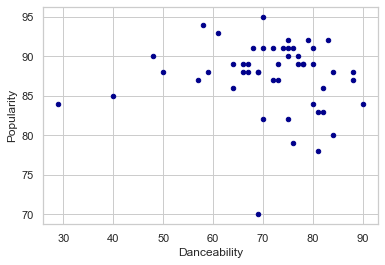

In [242]:
scatter_plot = top50.plot.scatter(x='Danceability', y='Popularity', c='DarkBlue')

**Q3.2:** Alternatively, use `plt.scatter` to recreate the scatterplot above.


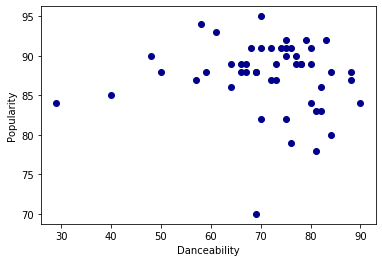

In [31]:
######
# your code here
######

plt.scatter(top50['Danceability'],top50['Popularity'], c='DarkBlue')
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.show()

This shows the lack of a correlation between the Danceability of a song and its popularity, based on just the top 50 songs, of course.

Please feel free to experiment with plotting other items of interest, and we recommend using Seaborn.

## Practice Problems 

**Q3.3:** Print the shortest song (all features):

In [7]:
######
# your code here
######

top50.iloc[top50['Length'].idxmin()]

Unnamed: 0                 22
TrackName              Panini
ArtistName          Lil Nas X
Genre             country rap
BeatsPerMinute            154
Energy                     59
Danceability               70
Loudness                   -6
Liveness                   12
Valence                    48
Length                    115
Acousticness               34
Speechiness                 8
Popularity                 91
Name: 21, dtype: object

**Q3.4:** Print the 5 shortest songs (all features):

In [334]:
######
# your code here
######

top50.sort_values("Length", ascending=True)[0:5]

**Q3.5:**  What is the average length of the 5 shortest songs?

In [343]:
######
# your code here
######

top50.sort_values("Length", ascending=True)[0:5]['Length'].mean()

**Q3.6:**  How many distinct genres are present in the top 50 songs?

In [23]:
######
# your code here
######

len(top50['Genre'].unique())

21

**Q3.7:**  Print the songs that have a Danceability score above 80 and a popularity above 86. HINT: you can combine conditional statements with the & operator, and each item must be surrounded with ( ) brackets.

In [24]:
######
# your code here
######

top50[(top50['Danceability'] > 80) & (top50['Popularity'] > 86)]

,Unnamed: 0,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
14,15,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83,-4,12,10,205,10,5,92
18,19,Lalala,Y2K,canadian hip hop,130,39,84,-8,14,50,161,18,8,88
44,45,Con Altura,ROSALÍA,r&b en espanol,98,69,88,-4,5,75,162,39,12,88


**Q3.8:**  Plot a bar plot of the Genre counts (x-axis is the Genres, y-axis is the # of songs with that Genre)

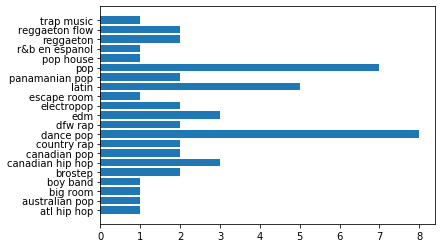

In [45]:
######
# your code here
######

# despite what it says in the question wording, it is more legible if you flip y and x axis
# using plt.barh instead of plt.bar.

plt.barh(np.unique(top50['Genre']),np.unique(top50['Genre'],return_counts=True)[1])
plt.show()

**Q3.9 (open ended):** Think of a _subset_ of the data that you're interested in. Think of an interesting plot that could be shown to illustrate that data. With a partner, discuss whose would be easier to create. Together, create that plot. Then, try to create the harder plot.

In [64]:
######
# your code here
######

# let's compare the two most common genres

subset1 = top50[top50['Genre'] == 'dance pop']
subset2 = top50[top50['Genre'] == 'pop']

# mean differences
(subset1.describe() - subset2.describe()).loc[['mean']]


,Unnamed: 0,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
mean,4.589286,-2.267857,-3.410714,1.821429,0.160714,3.357143,-12.125,7.196429,5.571429,5.964286,-0.107143


In [65]:
# std deviation of these mean difference (without deviding by sqrt(n1+n2))
np.sqrt((subset1.describe()**2 + subset2.describe()**2).loc[['std']])

,Unnamed: 0,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
std,25.125992,41.892507,26.183078,21.26645,2.748376,13.763305,31.173573,35.084676,31.246333,16.786474,4.896549


So the biggest difference appears to be valence, n terms of standard deciations. So let look at those histograms:

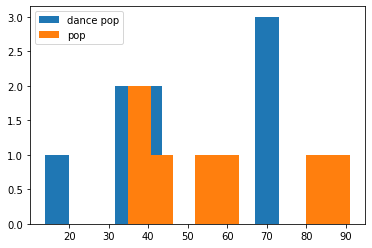

In [67]:
plt.hist(subset1['Valence'],label="dance pop")
plt.hist(subset2['Valence'],label="pop")
plt.legend()
plt.show()

And the above histogram shows that subset1 ('dance pop') has lower valence than subset2 ('pop'), on average.  But it really is nothing way too overwhelming.

##  Part 4: Beautiful Soup 
Data Engineering, the process of gathering and preparing data for analysis, is a very big part of Data Science.

Datasets might not be formatted in the way you need (e.g. you have categorical features but your algorithm requires numerical features); or you might need to cross-reference some dataset to another that has a different format; or you might be dealing with a dataset that contains missing or invalid data.

These are just a few examples of why data retrieval and cleaning are so important.

---

### `requests`:  Retrieving Data from the Web

In HW1, you will be asked to retrieve some data from the Internet. `Python` has many built-in libraries that were developed over the years to do exactly that (e.g. `urllib`, `urllib2`, `urllib3`).

However, these libraries are very low-level and somewhat hard to use. They become especially cumbersome when you need to issue POST requests or authenticate against a web service.

Luckly, as with most tasks in `Python`, someone has developed a library that simplifies these tasks. In reality, the requests made both on this lab and on HW1 are fairly simple, and could easily be done using one of the built-in libraries. However, it is better to get acquainted to `requests` as soon as possible, since you will probably need it in the future.

In [53]:
# You tell Python that you want to use a library with the import statement.
import requests

Now that the requests library was imported into our namespace, we can use the functions offered by it.

In this case we'll use the appropriately named `get` function to issue a *GET* request. This is equivalent to typing a URL into your browser and hitting enter.

In [56]:
# Get the HU Wikipedia page
req = requests.get("https://en.wikipedia.org/wiki/Harvard_University")

Python is an Object Oriented language, and everything on it is an object. Even built-in functions such as `len` are just syntactic sugar for acting on object properties.

We will not dwell too long on OO concepts, but some of Python's idiosyncrasies will be easier to understand if we spend a few minutes on this subject.

When you evaluate an object itself, such as the `req` object we created above, Python will automatially call the `__str__()` or `__repr__()` method of that object. The default values for these methods are usually very simple and boring. The `req` object however has a custom implementation that shows the object type (i.e. `Response`) and the HTTP status number (200 means the request was successful).

In [57]:
req

<Response [200]>

Just to confirm, we will call the `type` function on the object to make sure it agrees with the value above.

In [58]:
type(req)

requests.models.Response

Another very nifty Python function is `dir`. You can use it to list all the properties of an object.

By the way, properties starting with a single and double underscores are usually not meant to be called directly.

In [59]:
dir(req)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

Right now `req` holds a reference to a *Request* object; but we are interested in the text associated with the web page, not the object itself.

So the next step is to assign the value of the `text` property of this `Request` object to a variable.

In [60]:
page = req.text
page[20000:30000]

'ston">Greater Boston</a>:<sup id="cite_ref-12" class="reference"><a href="#cite_note-12">&#91;12&#93;</a></sup> its 209-acre (85&#160;ha) original <a href="/wiki/Harvard_College" title="Harvard College">undergraduate</a> campus is centered on <a href="/wiki/Harvard_Yard" title="Harvard Yard">Harvard Yard</a> in Cambridge, 3 miles (5&#160;km) northwest of Boston; the <a href="/wiki/Harvard_Business_School" title="Harvard Business School">business school</a> and many athletics facilities, including <a href="/wiki/Harvard_Stadium" title="Harvard Stadium">Harvard Stadium</a>, are across the <a href="/wiki/Charles_River" title="Charles River">Charles River</a> in the <a href="/wiki/Allston" title="Allston">Allston</a> neighborhood of Boston; and the <a href="/wiki/Harvard_Medical_School" title="Harvard Medical School">medical</a>, <a href="/wiki/Harvard_School_of_Dental_Medicine" title="Harvard School of Dental Medicine">dental</a>, and <a href="/wiki/Harvard_T.H._Chan_School_of_Public_Hea

Great! Now we have the text of the Harvard University Wikipedia page. But this mess of HTML tags would be a pain to parse manually. Which is why we will use another very cool Python library called `BeautifulSoup`.

### `BeautifulSoup`

Parsing data would be a breeze if we could always use well formatted data sources, such as CSV, JSON, or XML; but some formats such as HTML are at the same time a very popular and a pain to parse.

One of the problems with HTML is that over the years browsers have evolved to be very forgiving of "malformed" syntax. Your browser is smart enough to detect some common problems, such as open tags, and correct them on the fly.

Unfortunately, we do not have the time or patience to implement all the different corner cases, so we'll let BeautifulSoup do that for us.

You'll notice that the `import` statement bellow is different from what we used for `requests`. The _from library import thing_ pattern is useful when you don't want to reference a function byt its full name (like we did with `requests.get`), but you also don't want to import every single thing on that library into your namespace.

In [61]:
from bs4 import BeautifulSoup

`BeautifulSoup` can deal with `HTML` or `XML` data, so the next line parses the contents of the `page` variable using its `HTML` parser, and assigns the result of that to the `soup` variable.

In [63]:
soup = BeautifulSoup(page, 'html.parser')

In [64]:
type(soup)

bs4.BeautifulSoup

Doesn't look much different from the `page` object representation. Let's make sure the two are different types.

In [65]:
type(page)

str

Looks like they are indeed different.

`BeautifulSoup` objects have a cool little method that allows you to see the `HTML` content in a nice, indented way.

In [66]:
print(soup.prettify()[:1000])

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Harvard University - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"a6f27981-eaa1-43e8-aec7-cb0d3aaea5e4","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Harvard_University","wgTitle":"Harvard University","wgCurRevisionId":964138497,"wgRevisionId":964138497,"wgArticleId":18426501,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: location","Webarchive template wayback links","CS1: Julian–Gregorian uncertainty","CS1 errors: missing periodical","Wikipedi

Looks like it's our page!

We can now reference elements of the `HTML` document in different ways. One very convenient way is by using the dot notation, which allows us to access the elements as if they were properties of the object.

In [67]:
soup.title

<title>Harvard University - Wikipedia</title>

This is nice for `HTML` elements that only appear once per page, such the the `title` tag. But what about elements that can appear multiple times?

In [68]:
# Be careful with elements that show up multiple times.
soup.p

<p class="mw-empty-elt">
</p>

Uh Oh. Turns out the attribute syntax in `Beautiful` soup is what is called *syntactic sugar*. That's why it is safer to use the explicit commands behind that syntactic sugar I mentioned. These are:
* `BeautifulSoup.find` for getting single elements, and 
* `BeautifulSoup.find_all` for retrieving multiple elements.

In [69]:
len(soup.find_all("p"))

84

If you look at the Wikipedia page on your browser, you'll notice that it has a couple of tables in it. We will be working with the "Demographics" table, but first we need to find it.

One of the `HTML` attributes that will be very useful to us is the `class` attribute.

Getting the class of a single element is easy!

In [70]:
soup.table["class"]

['infobox', 'vcard']

Next we will use a *list comprehension* to see all the tables that have a `class` attribute. 

In [71]:
# the classes of all tables that have a class attribute set on them
[t["class"] for t in soup.find_all("table") if t.get("class")]

[['infobox', 'vcard'],
 ['toccolours'],
 ['infobox'],
 ['wikitable', 'sortable', 'collapsible', 'collapsed', 'floatright'],
 ['wikitable', 'sortable', 'collapsible', 'collapsed', 'floatright'],
 ['wikitable'],
 ['box-Cleanup_gallery', 'plainlinks', 'metadata', 'ambox', 'ambox-style'],
 ['metadata', 'mbox-small'],
 ['nowraplinks', 'mw-collapsible', 'mw-collapsed', 'navbox-inner'],
 ['nowraplinks', 'navbox-subgroup'],
 ['nowraplinks', 'mw-collapsible', 'mw-collapsed', 'navbox-inner'],
 ['nowraplinks', 'mw-collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'mw-collapsible', 'mw-collapsed', 'navbox-inner'],
 ['nowraplinks', 'mw-collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'mw-collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'mw-collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'mw-collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'mw-collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'mw-collapsible', '

As already mentioned, we will be using the Demographics table for this lab. The next cell contains the `HTML` elements of said table. We will render it in different parts of the notebook to make it easier to follow along the parsing steps.

In [72]:
table_demographics = soup.find_all("table", "wikitable")[2]

In [73]:
from IPython.core.display import HTML
HTML(str(table_demographics))

,Undergrad,Grad/prof
Asian,21%,13%
Black,9%,5%
Hispanic or Latino,11%,7%
White,37%,38%
Two or more races,8%,3%
International,12%,32%


First we'll use a list comprehension to extract the rows (*tr*) elements.

In [74]:
rows = [row for row in table_demographics.find_all("tr")]
print(rows)

[<tr>
<th></th>
<th>Undergrad</th>
<th>Grad/prof
</th></tr>, <tr>
<th>Asian
</th>
<td>21%</td>
<td>13%
</td></tr>, <tr>
<th>Black
</th>
<td>9%</td>
<td>5%
</td></tr>, <tr>
<th>Hispanic or Latino
</th>
<td>11%</td>
<td>7%
</td></tr>, <tr>
<th>White
</th>
<td>37%</td>
<td>38%
</td></tr>, <tr>
<th>Two or more races
</th>
<td>8%</td>
<td>3%
</td></tr>, <tr>
<th>International
</th>
<td>12%</td>
<td>32%
</td></tr>]


In [75]:
header_row = rows[0]
HTML(str(header_row))

,Undergrad,Grad/prof


We will then use a `lambda` expression to replace new line characters with spaces. `Lambda` expressions are to functions what list comprehensions are to lists: namely a more concise way to achieve the same thing.

In reality, both lambda expressions and list comprehensions are a little different from their function and loop counterparts. But for the purposes of this class we can ignore those differences.

In [76]:
# Lambda expressions return the value of the expression inside it.
# In this case, it will return a string with new line characters replaced by spaces.
rem_nl = lambda s: s.replace("\n", " ")

#### Splitting the data
Next we extract the text value of the columns. If you look at the table above, you'll see that we have three columns and six rows.

Here we're doing the following:
* Taking the first element (`Python` indices start at zero)
* Iterating over the *th* elements inside it
* Taking the text value of those elements

We should end up with a list of column names.

But there is one little caveat: the first column of the table is actually an empty string (look at the cell right above the row names). We could add it to our list and then remove it afterwards; but instead we will use the `if` statement inside the list comprehension to filter that out.

In the following cell, `get_text` will return an empty string for the first cell of the table, which means that the test will fail and the value will not be added to the list.

In [77]:
# the if col.get_text() takes care of no-text in the upper left
columns = [rem_nl(col.get_text()) for col in header_row.find_all("th") if col.get_text()]
columns

['Undergrad', 'Grad/prof ']

Now let's do the same for the rows. Notice that since we have already parsed the header row, we will continue from the second row.

In [78]:
indexes = [row.find("th").get_text() for row in rows[1:]]
indexes

['Asian\n',
 'Black\n',
 'Hispanic or Latino\n',
 'White\n',
 'Two or more races\n',
 'International\n']

Now we want to transform the string on the cells to integers.  To do this, we follow a very common `python` pattern:
1. Check if the last character of the string is a percent sign
2. If it is, then convert the characters before the percent sign to integers
3. If one of the prior checks fails, return a value of `None`

These steps can be conveniently packaged into a function using `if-else` statements.

In [79]:
def to_num(s):
    if s[-1] == "%":
        return int(s[:-1])
    else:
        return None

Notice the `Python` slices are open on the upper bound. So the `[:-1]` construct will return all elements of the string, except for the last.

Another nice way to write our `to_num` function would be
```python
def to_num(s):
    return int(s[:-1]) if s[-1] == "%" else None
```
Notice that we only had to write `return` one time and everything conveniently fits on one line.  I'll leave it up to you to decide if it's readable or not.

Now we use the `to_num` function in a list comprehension to parse the table values.

Notice that we have two `for ... in ...` in this list comprehension. That is perfectly valid and somewhat common.

Although there is no real limit to how many iterations you can perform at once, having more than two can be visually unpleasant, at which point either regular nested loops or saving intermediate comprehensions might be a better solution.

In [80]:
values = [to_num(value.get_text()) for row in rows[1:] for value in row.find_all("td")]
values

[21, None, 9, None, 11, None, 37, None, 8, None, 12, None]

The problem with the list above is that the values lost their grouping.

The `zip` function is used to combine two sequences element wise. So 
```python
zip([1,2,3], [4,5,6])
```
would return
```python
[(1, 4), (2, 5), (3, 6)]
```

Next we create three arrays corresponding to the three columns by putting every three values in each list.

In [81]:
stacked_values_lists = [values[i::3] for i in range(len(columns))]
stacked_values_lists

[[21, None, 37, None], [None, 11, None, 12]]

We then use `zip`. 

In [82]:
stacked_values = zip(*stacked_values_lists)
list(stacked_values)

[(21, None), (None, 11), (37, None), (None, 12)]

Notice the use of the `*` in front: that converts the list of lists to a set of arguments to `zip`. See the ASIDE below.

In [83]:
# Here's the original HTML table for visual understanding
HTML(str(table_demographics))

,Undergrad,Grad/prof
Asian,21%,13%
Black,9%,5%
Hispanic or Latino,11%,7%
White,37%,38%
Two or more races,8%,3%
International,12%,32%


**Q4.1:** Use the tables in `soup` to determine how Harvard's Computer Science program ranks both Nationally and Globally.

In [93]:
######
# your code here
######
HTML(str(soup.find_all("table", "wikitable")[0]))


Program,Ranking
Biological Sciences,4
Business,6
Chemistry,2
Clinical Psychology,10
Computer Science,16
Earth Sciences,8
Economics,1
Education,1
Engineering,22
English,8


In [92]:
HTML(str(soup.find_all("table", "wikitable")[1]))

Program,Ranking
Agricultural Sciences,22
Arts & Humanities,2
Biology & Biochemistry,1
Cardiac & Cardiovascular Systems,1
Chemistry,15
Clinical Medicine,1
Computer Science,47
Economics & Business,1
Electrical & Electronic Engineering,136
Engineering,27


COmputer Science is